In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Combine COVID Datasets with Wikipedia Hobbies Datasets

In [2]:
german_df = pd.read_csv('hobbies/german.csv')
japanese_df = pd.read_csv('hobbies/japanese.csv')
tamil_df = pd.read_csv('hobbies/tamil.csv')
vietnamese_df = pd.read_csv('hobbies/vietnamese.csv')
serbian_df = pd.read_csv('hobbies/serbian.csv')

In [3]:
frames = [german_df,japanese_df,tamil_df,vietnamese_df,serbian_df]

In [4]:
df = pd.concat(frames)
df.Date = pd.to_datetime(df.Date)
df

/tmp/ipykernel_11668/2527914869.py:2: UserWarning: Parsing '13/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Date = pd.to_datetime(df.Date)
/tmp/ipykernel_11668/2527914869.py:2: UserWarning: Parsing '14/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Date = pd.to_datetime(df.Date)
/tmp/ipykernel_11668/2527914869.py:2: UserWarning: Parsing '15/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Date = pd.to_datetime(df.Date)
/tmp/ipykernel_11668/2527914869.py:2: UserWarning: Parsing '16/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Date = pd.to_datetime(df.Date)
/tmp/ipykernel_11668/2527914869.py:2: UserWarning: Parsing '17/01/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
 

,Date,Book,Jogging,Origami,Yoga,Bread,Orchids,Mindfulness,Podcast,Calligraphy,Board Games,Language
0,2019-01-01,191,80,122,687,184,370,1,1272,368,1796,German
1,2019-01-02,216,75,166,887,228,440,2,1798,172,1319,German
2,2019-01-03,264,91,140,922,218,416,1,1575,181,1010,German
3,2019-01-04,224,78,133,903,193,427,1,1680,187,1016,German
4,2019-01-05,201,59,162,849,241,416,1,1645,197,1165,German
...,...,...,...,...,...,...,...,...,...,...,...,...
573,2020-07-27,0,13,2,22,12,16,3,55,6,20,Serbian
574,2020-07-28,2,3,0,22,7,15,6,43,5,16,Serbian
575,2020-07-29,2,19,4,28,10,18,5,46,7,22,Serbian
576,2020-07-30,0,8,1,17,16,14,5,45,8,27,Serbian


In [5]:
df.columns = df.columns.str.strip().str.lower()

In [6]:
lockdown_df = pd.read_csv('covid_data/lockdown_severity.csv', index_col=0)
lockdown_df['date'] = pd.to_datetime(lockdown_df.date)
lockdown_df

,country,date,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,stay_home_requirements,after_lockdown_start,stringency_index,language
0,IND,2020-01-01,NaN,NaN,0,0,0.0,Tamil
1,DEU,2020-01-01,NaN,NaN,0,0,0.0,German
2,CHE,2020-01-01,NaN,NaN,0,0,0.0,German
3,JPN,2020-01-01,NaN,NaN,0,0,0.0,Japanese
4,AUT,2020-01-01,NaN,NaN,0,0,0.0,German
...,...,...,...,...,...,...,...,...
2557,AUT,2020-12-31,-0.343366,0.270152,2,1,NaN,German
2558,VNM,2020-12-31,0.223923,0.189882,2,1,NaN,Vietnamese
2559,SRB,2020-12-31,-0.063242,0.208936,1,1,NaN,Serbian
2560,CHE,2020-12-31,-0.214519,0.240731,1,1,NaN,German


In [7]:
df_merged = pd.merge(df, lockdown_df,  on=['date', 'language'])
df_merged.sort_values(by='date', inplace=True)
df_merged.set_index('date', inplace=True)
df_merged = df_merged[df_merged.index <= '2020-07-01']

In [8]:
df_merged.head(7)

,book,jogging,origami,yoga,bread,orchids,mindfulness,podcast,calligraphy,board games,language,country,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,stay_home_requirements,after_lockdown_start,stringency_index
date,,,,,,,,,,,,,,,,,
2020-01-01,159,69,135,718,191,282,0,1943,133,1667,German,DEU,NaN,NaN,0,0,0.0
2020-01-01,11,0,6,80,1,3,1,2,1,2,Tamil,IND,NaN,NaN,0,0,0.0
2020-01-01,33,22,10,33,43,52,17,33,52,26,Vietnamese,VNM,NaN,NaN,0,0,0.0
2020-01-01,2,7,4,8,15,8,5,18,6,159,Serbian,SRB,NaN,NaN,0,0,0.0
2020-01-01,90,50,133,233,177,123,209,183,201,164,Japanese,JPN,NaN,NaN,0,0,0.0
2020-01-01,159,69,135,718,191,282,0,1943,133,1667,German,CHE,NaN,NaN,0,0,0.0
2020-01-01,159,69,135,718,191,282,0,1943,133,1667,German,AUT,NaN,NaN,0,0,0.0


In [9]:
df_merged.tail(7)

,book,jogging,origami,yoga,bread,orchids,mindfulness,podcast,calligraphy,board games,language,country,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,stay_home_requirements,after_lockdown_start,stringency_index
date,,,,,,,,,,,,,,,,,
2020-07-01,169,47,257,320,447,210,381,403,203,258,Japanese,JPN,-0.062603,0.119742,0,1,25.93
2020-07-01,189,51,128,591,238,394,0,1850,129,341,German,CHE,0.081794,0.145635,0,1,35.19
2020-07-01,41,22,22,40,72,68,22,58,16,37,Vietnamese,VNM,0.075702,0.212325,0,1,55.56
2020-07-01,189,51,128,591,238,394,0,1850,129,341,German,DEU,0.044019,0.177907,0,1,63.43
2020-07-01,1,12,3,10,24,18,3,23,6,128,Serbian,SRB,0.065634,0.164622,1,1,38.89
2020-07-01,8,0,2,47,1,3,0,0,2,4,Tamil,IND,-0.199757,0.155942,2,1,87.50
2020-07-01,189,51,128,591,238,394,0,1850,129,341,German,AUT,0.090958,0.142961,0,1,68.98


In [10]:
df_merged.language[df_merged.language == 'German'] = df_merged.language + ' (' + df_merged.country + ')'
df_merged = df_merged.drop(columns=['country'])

In [11]:
df_merged.language.unique()

array(['German (DEU)', 'Tamil', 'Vietnamese', 'Serbian', 'Japanese',
       'German (CHE)', 'German (AUT)'], dtype=object)

In [12]:
df_merged.head(1)

,book,jogging,origami,yoga,bread,orchids,mindfulness,podcast,calligraphy,board games,language,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,stay_home_requirements,after_lockdown_start,stringency_index
date,,,,,,,,,,,,,,,,
2020-01-01,159,69,135,718,191,282,0,1943,133,1667,German (DEU),NaN,NaN,0,0,0.0


# Remove Outliers

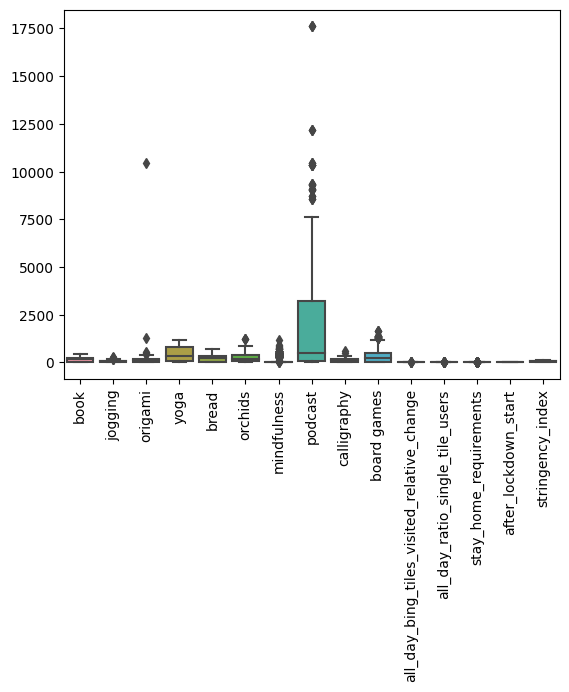

In [13]:
sns.boxplot(df_merged)
_ = plt.xticks(rotation=90)

In [14]:
## Maybe don't do this, because it drops Japanese completely
# cols = ['book', 'jogging', 'origami', 'yoga', 'bread', 'orchids', 'mindfulness',
#        'podcast', 'calligraphy', 'board games']

# Q1 = df_merged[cols].quantile(0.25)
# Q3 = df_merged[cols].quantile(0.75)
# IQR = Q3 - Q1

# df_merged = df_merged[~((df_merged[cols] < (Q1 - 1.5 * IQR)) |(df_merged[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
# drop origami outlier
df_merged = df_merged[df_merged['origami'] < 10000]

In [16]:
# sns.boxplot(df_merged)
# _ = plt.xticks(rotation=90)

# Save cleaned merged dataset to new file

In [17]:
df_merged.to_csv('output_data/cleaned.csv')

# Normalize Data

In [18]:
df_hobbies = df_merged.drop(columns=['all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users', 'stay_home_requirements', 'after_lockdown_start', 'stringency_index'])
normalized_df=(df_hobbies-df_hobbies.mean())/df_hobbies.std()

/tmp/ipykernel_11668/1475989140.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df_hobbies-df_hobbies.mean())/df_hobbies.std()


<AxesSubplot: xlabel='date'>

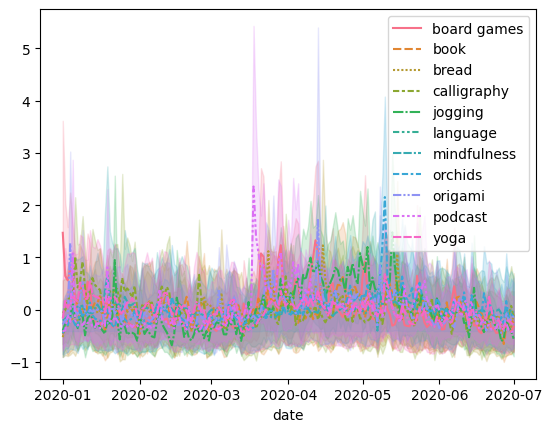

In [19]:
sns.lineplot(normalized_df)

In [20]:
df_merged.to_csv('output_data/normalized.csv')

# Melt Data

In [21]:
df_merged.reset_index(inplace=True)
df_merged = df_merged.melt(id_vars=['language','date','all_day_bing_tiles_visited_relative_change', 'all_day_ratio_single_tile_users', 'stay_home_requirements', 'after_lockdown_start', 'stringency_index'], 
        var_name="hobby", 
        value_name="pageviews")
df_merged.set_index(df_merged.date, inplace=True)
df_merged = df_merged.drop(columns=['date'])

In [22]:
df_merged.to_csv('output_data/melted.csv')